In [25]:
#Do not need to run this line
#!mamba install -qy gmt pygmt

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import hvplot.xarray
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

In [27]:
from IPython import display
display.set_matplotlib_formats('retina')

In [28]:
data_dir = '/home/jovyan/data/bravoseis_data'

In [29]:
df_allEvents = pd.read_csv(data_dir + '/noaa_hydroacoustic/seasick_output/eqs.csv',
                  sep=',',index_col='time')
df_allEvents['ep_lat']=df_allEvents['ep_lat']*-1
df_allEvents['ep_lon']=df_allEvents['ep_lon']*-1
df_allEvents.head()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2,event,notes,day,month,year
time,,,,,,,,,,,,,,
2019-07-26 02:44:13.300,3.0,654.0,62.344,57.047,0.062,0.212,6.484,187.82,188.1,IQ,in network NE corner,26,7,2019
2019-07-26 03:06:48.200,4.0,2314.0,63.124,58.867,0.012,0.011,0.781,195.79,196.1,IQ,out of network mid basin,26,7,2019
2019-07-26 03:22:14.400,3.0,324.0,62.786,58.856,0.020,0.034,1.039,190.89,191.1,IQ,in network middle,26,7,2019
2019-07-26 03:27:06.800,3.0,654.0,62.450,56.766,0.062,0.283,9.892,190.51,190.7,IQ,out of network,26,7,2019
2019-07-26 03:34:09.900,4.0,4325.0,63.001,58.121,0.015,0.022,1.073,191.83,192.0,IQ,out of network mid basin,26,7,2019


In [30]:
df_allEvents.describe()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,day,month,year
count,5164.000000,5059.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000
mean,131.420023,141540.419252,-7660.242725,-46.716655,-0.974998,0.408850,10.465888,191.629577,15.942874,6.821069,2019.102440
std,9105.307513,204637.032661,58548.961999,34.826621,8.361849,2.101616,20.128944,27.328312,9.703648,2.638261,0.303255
min,3.000000,61.994000,-654321.000000,-79.366000,-63.568000,0.000000,0.000000,0.505000,1.000000,1.000000,2019.000000
25%,4.000000,2134.000000,-62.960000,-59.015250,0.025000,0.030000,1.238000,189.920000,7.000000,6.000000,2019.000000
50%,5.000000,23456.000000,-62.634500,-58.064000,0.053000,0.052000,3.007000,194.860000,15.000000,7.000000,2019.000000
75%,6.000000,213456.000000,-62.258000,-57.109000,0.143000,0.181000,8.940250,199.762500,25.000000,8.000000,2019.000000
max,654321.000000,654321.000000,68.975000,77.488000,68.835000,61.273000,207.310000,230.460000,31.000000,12.000000,2020.000000


In [31]:
df_eqs = df_allEvents.loc[df_allEvents['event'] == 'EQ'].copy()# .copy creates its own dataframe 
cond1 = df_eqs["ep_lat"] < -62   
cond2 = df_eqs["ep_lat"] > -63.5
cond3 = df_eqs["ep_lon"] > -61
cond4 = df_eqs["ep_lon"] < -56.5

df_eqs = df_eqs[cond1 & cond2 & cond3 & cond4].copy()
df_eqs.head()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2,event,notes,day,month,year
time,,,,,,,,,,,,,,
2019-03-31 02:55:05.300,3.0,653.0,-62.027,-56.719,0.424,1.108,50.174,206.26,206.2,EQ,NaN,31,3,2019
2019-03-31 02:59:43.800,4.0,6542.0,-62.253,-57.150,0.059,0.035,0.794,199.98,200.3,EQ,NaN,31,3,2019
2019-03-31 06:58:25.400,3.0,236.0,-62.615,-59.769,0.041,0.192,5.341,207.05,207.3,EQ,NaN,31,3,2019
2019-03-31 07:53:36.800,3.0,321.0,-62.558,-59.524,0.025,0.043,1.456,205.77,206.0,EQ,NaN,31,3,2019
2019-03-31 17:11:58.500,4.0,3214.0,-62.506,-59.360,0.020,0.027,1.074,207.27,207.4,EQ,NaN,31,3,2019


In [32]:
df_eqs.describe()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,day,month,year
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,4.725490,190190.464052,-62.490363,-58.050382,0.098281,0.155709,7.182255,199.180229,14.189542,5.382353,2019.323529
std,1.213235,250761.489771,0.331559,1.033208,0.138406,0.278647,11.329078,7.404021,9.210295,3.446198,0.468589
min,3.000000,123.000000,-63.451000,-60.945000,0.000000,0.000000,0.015000,178.910000,1.000000,1.000000,2019.000000
25%,4.000000,2134.000000,-62.710500,-58.732000,0.025000,0.032000,1.121000,194.670000,5.000000,1.000000,2019.000000
50%,5.000000,45632.000000,-62.381000,-57.758000,0.047500,0.055000,2.846000,198.915000,12.000000,6.000000,2019.000000
75%,6.000000,344541.000000,-62.226250,-57.131500,0.128000,0.163000,8.558000,203.880000,22.000000,8.000000,2020.000000
max,6.000000,654321.000000,-62.027000,-56.607000,1.426000,3.233000,99.999000,225.310000,31.000000,12.000000,2020.000000


In [33]:
df_eqs['temp'] = (df_eqs['mdb']/ df_eqs['mdb'].max())
df_eqs['normalized'] = (df_eqs['temp']-df_eqs['temp'].min())
#df_eqs['eq_time']= (df_eqs['source_time']-df_eqs['source_time'].min())/(60*60*24)
df_eqs.head()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2,event,notes,day,month,year,temp,normalized
time,,,,,,,,,,,,,,,,
2019-03-31 02:55:05.300,3.0,653.0,-62.027,-56.719,0.424,1.108,50.174,206.26,206.2,EQ,NaN,31,3,2019,0.915450,0.121388
2019-03-31 02:59:43.800,4.0,6542.0,-62.253,-57.150,0.059,0.035,0.794,199.98,200.3,EQ,NaN,31,3,2019,0.887577,0.093516
2019-03-31 06:58:25.400,3.0,236.0,-62.615,-59.769,0.041,0.192,5.341,207.05,207.3,EQ,NaN,31,3,2019,0.918956,0.124895
2019-03-31 07:53:36.800,3.0,321.0,-62.558,-59.524,0.025,0.043,1.456,205.77,206.0,EQ,NaN,31,3,2019,0.913275,0.119214
2019-03-31 17:11:58.500,4.0,3214.0,-62.506,-59.360,0.020,0.027,1.074,207.27,207.4,EQ,NaN,31,3,2019,0.919933,0.125871


In [34]:
col_names = ['lon','lat','depth'] 
col_names2 = ['lat','lon','depth'] 

In [35]:
df_bathy = pd.read_csv(data_dir + '/Bransfield15m.txt',
                  sep=' ', header=0, names=col_names2,
                  dtype = {'lon': np.float64,'lat': np.float64, 'depth': np.float64})
cond1 = df_bathy["lat"] < -62    
cond2 = df_bathy["lat"] > -63.5
cond3 = df_bathy["lon"] > -61
cond4 = df_bathy["lon"] < -56.5

df_bathy = df_bathy[cond1 & cond2 & cond3 & cond4].copy()

df_bathy.tail()

,lat,lon,depth
14323646,-62.313015,-58.242939,-1628.702
14323647,-62.313018,-58.242649,-1634.167
14323648,-62.313020,-58.242360,-1634.293
14323649,-62.313023,-58.242071,-1634.405
14323650,-62.313025,-58.241782,-1635.926


In [36]:
bathy = df_bathy.hvplot.points(x='lon', y='lat', c ='depth',
                        geo=True, datashade = True,
                      cmap = 'bone_r')

In [37]:
bathy

:DynamicMap   []
   :RGB   [lon,lat]   (R,G,B,A)

In [38]:
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/srtm30plus_v6'

In [39]:
ds = xr.open_dataset(url)

In [40]:
ds

<xarray.Dataset>
Dimensions:           (lat: 21600, lon: 43200)
Coordinates:
  * lon               (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat               (lat) float64 90.0 89.99 89.98 ... -89.97 -89.98 -89.99
Data variables:
    GDAL_Geographics  |S64 ...
    topo              (lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    AREA_OR_POINT:  Area
    title:          UCSD SRTM30_v6 Global DEM (30 sec)
    DODS.strlen:    0

In [41]:
#ds.topo.plot()

In [42]:
ds_bran = ds.sel(lon=slice(-61 ,-56.5),lat = slice(-62, -63.5))

In [43]:
ds_bran

<xarray.Dataset>
Dimensions:           (lat: 181, lon: 541)
Coordinates:
  * lon               (lon) float64 -61.0 -60.99 -60.98 ... -56.52 -56.51 -56.5
  * lat               (lat) float64 -62.0 -62.01 -62.02 ... -63.48 -63.49 -63.5
Data variables:
    GDAL_Geographics  |S64 b''
    topo              (lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    AREA_OR_POINT:  Area
    title:          UCSD SRTM30_v6 Global DEM (30 sec)
    DODS.strlen:    0

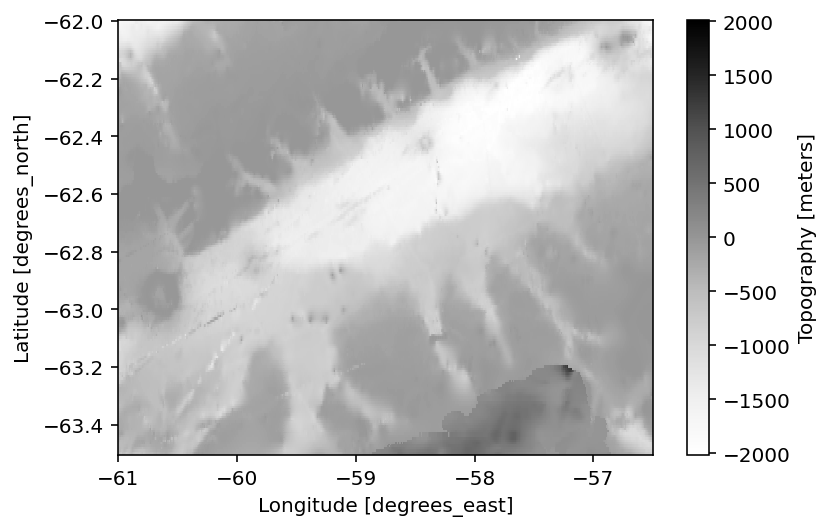

In [44]:
topo = ds_bran.topo.plot(cmap = 'Greys')

In [45]:
padding = 0.3
extents = [min(ds_bran.lon)-padding, max(ds_bran.lon)+padding, min(ds_bran.lat)-padding/2, max(ds_bran.lat)+padding/2]
extents

[<xarray.DataArray 'lon' ()>
 array(-61.3)
 Coordinates:
     lon      float64 -61.0,
 <xarray.DataArray 'lon' ()>
 array(-56.2)
 Coordinates:
     lon      float64 -56.5,
 <xarray.DataArray 'lat' ()>
 array(-63.65)
 Coordinates:
     lat      float64 -63.5,
 <xarray.DataArray 'lat' ()>
 array(-61.85)
 Coordinates:
     lat      float64 -62.0]

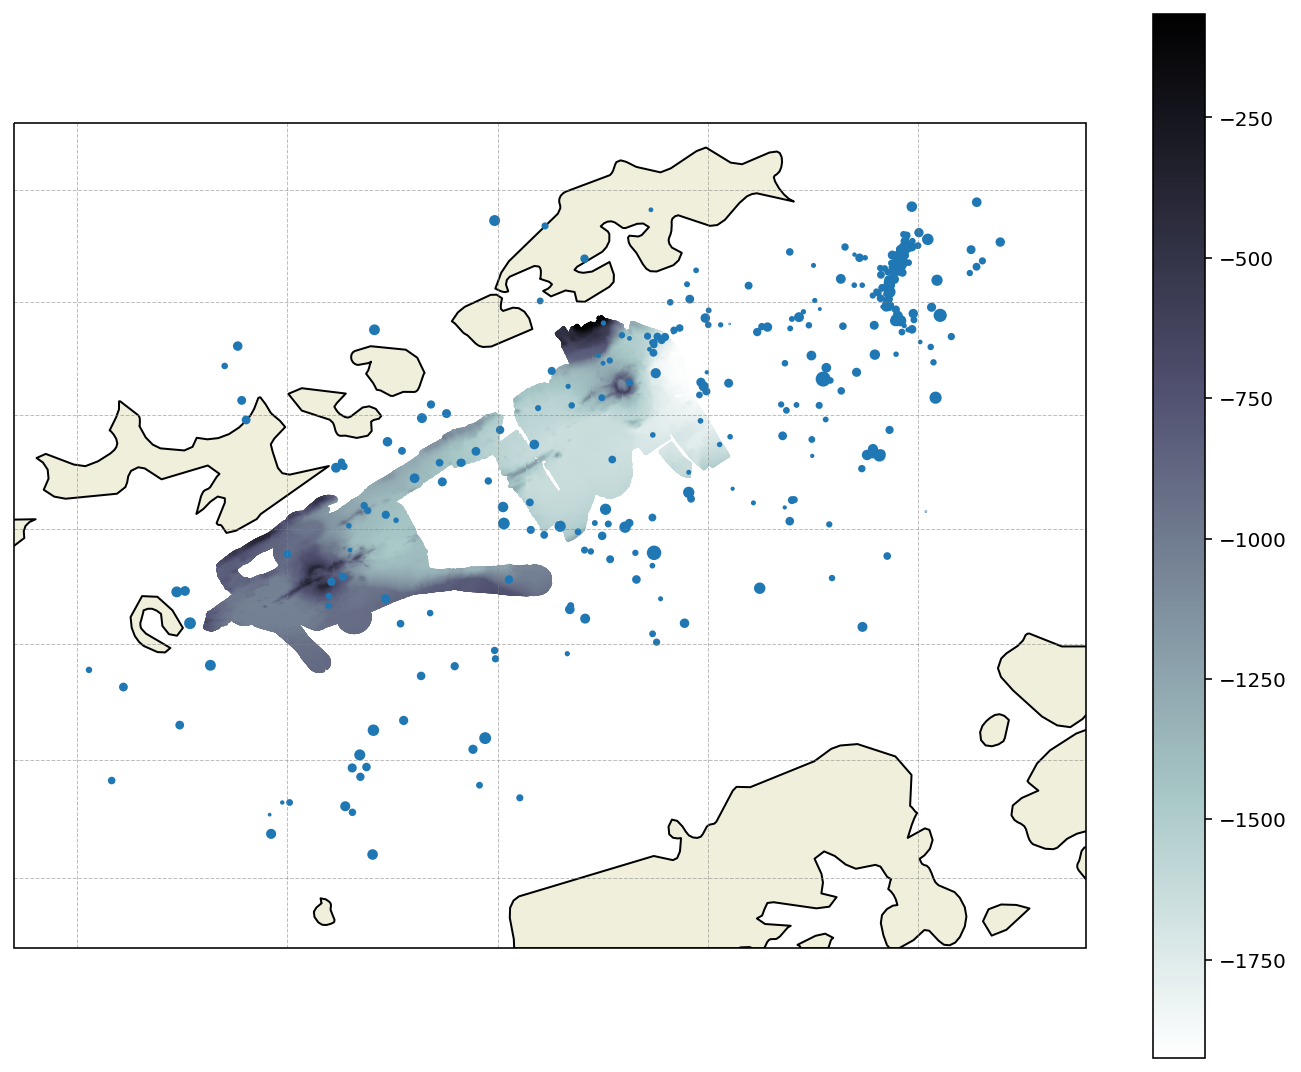

In [46]:
plt.rcParams['figure.figsize'] = (12,12)
central_lon = np.mean(extents[0:2])
central_lat = np.mean(extents[2:4])
ax = plt.axes(projection=ccrs.Mercator(central_longitude=central_lon, min_latitude=min(ds_bran.lat)-padding/2, max_latitude=max(ds_bran.lat)+padding/2, globe=None, latitude_true_scale=central_lat))
ax.set_extent(extents)
orca_decimate = df_bathy.iloc[::10, :]
sc = ax.scatter(orca_decimate.lon, orca_decimate.lat, c=orca_decimate.depth,
           s=0.2, transform=ccrs.PlateCarree(), cmap='bone_r')
plt.colorbar(sc, shrink=0.8)
gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
#ax.coastlines(resolution='10m');
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
sc = ax.scatter(df_eqs.ep_lon,
                df_eqs.ep_lat,
                transform= ccrs.PlateCarree(),
               s=np.square(df_eqs.normalized)*1000)
#cbar = plt.colorbar(sc, label = 'Date')
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format = '%m/%d'))

In [47]:
#Scratch

In [48]:
ds_ibsco = xr.load_dataset(data_dir + '/temp.nc')
ds_ibsco

<xarray.Dataset>
Dimensions:  (x: 13335, y: 13341)
Coordinates:
  * x        (x) float64 -3.333e+06 -3.333e+06 ... 3.333e+06 3.334e+06
  * y        (y) float64 -3.337e+06 -3.336e+06 ... 3.333e+06 3.333e+06
Data variables:
    z        (y, x) float32 inf inf inf inf inf inf ... inf inf inf inf inf inf
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdconvert
    history:      grdconvert ibcso_v1_bed.grd -Gtemp.nc\n\t(old cmd) Created ...
    description:  Polar Stereographic projection with truescale at 71 degree S
    GMT_version:  6.3.0 [64-bit]

In [49]:
#ccrs.Orthographic?

In [50]:
ds_ibsco_subset = ds_ibsco.sel(x=slice(-2800000, -2400000),y = slice(1333250,1740000))

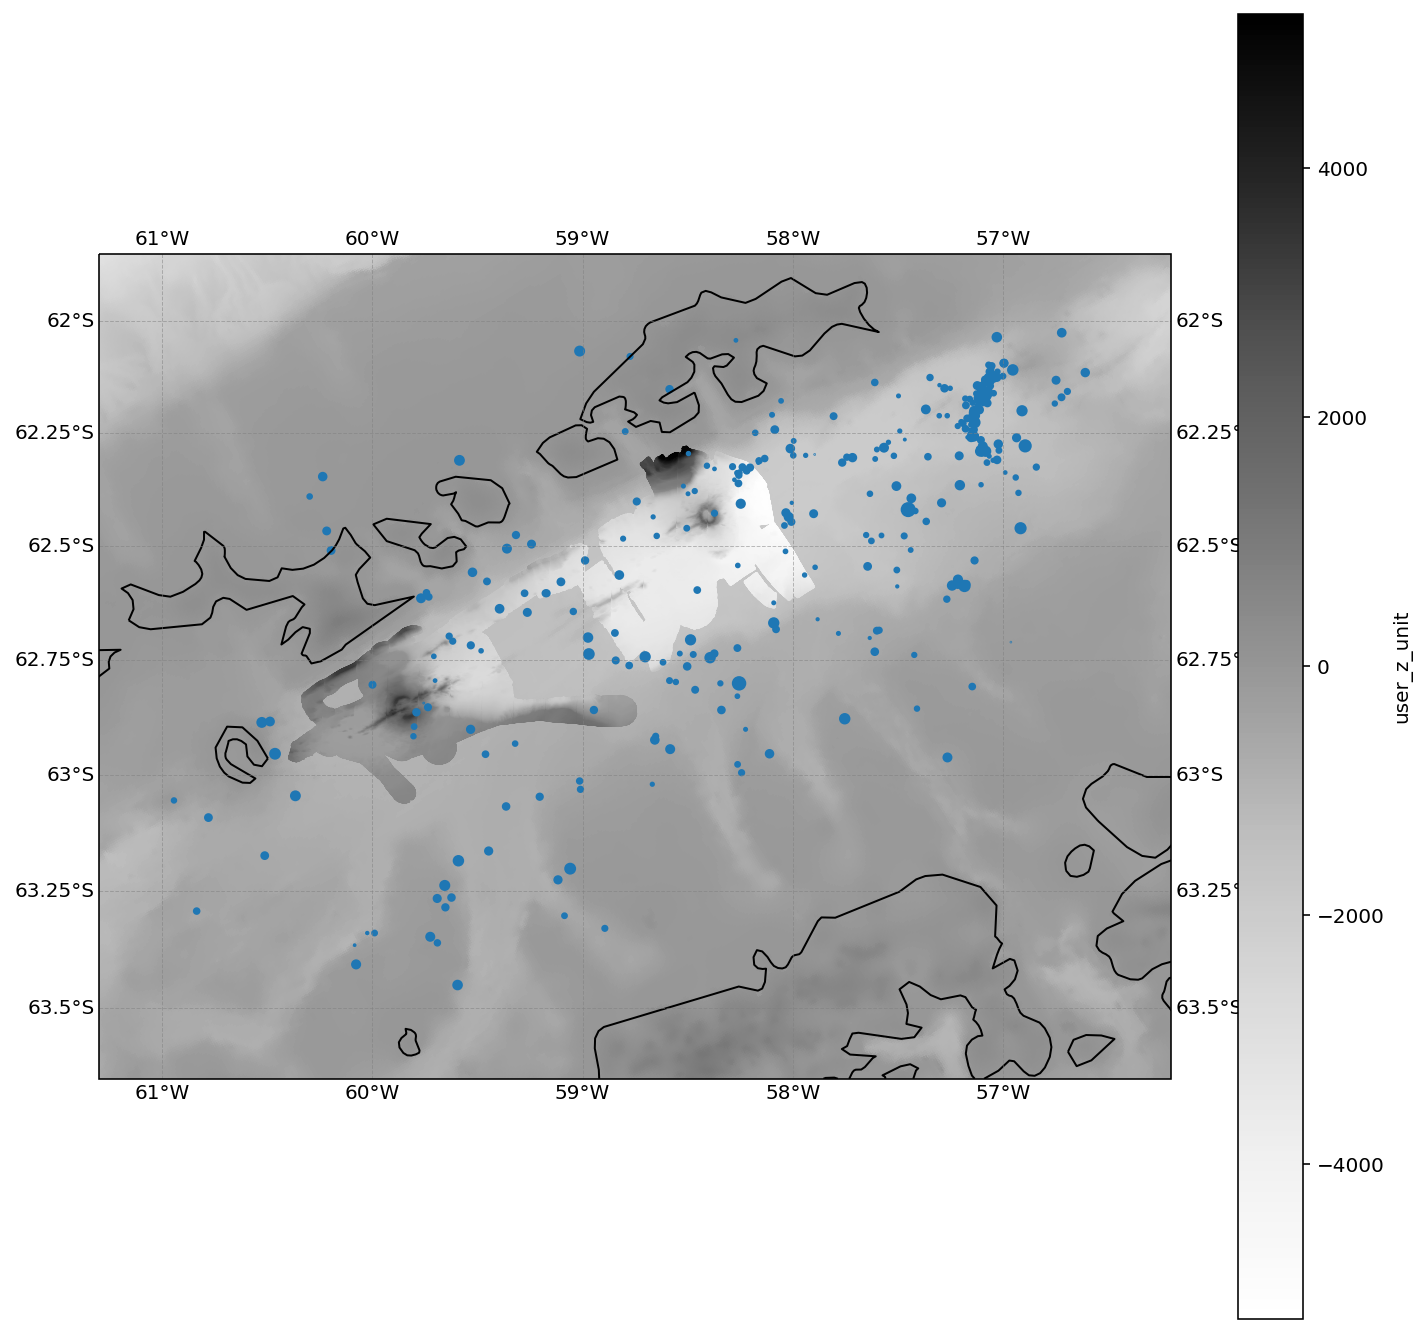

In [51]:
plt.close()
plt.rcParams['figure.figsize'] = (12,12)
ax = plt.axes(projection=ccrs.Mercator(central_longitude=central_lon, min_latitude=min(ds_bran.lat)-padding/2, max_latitude=max(ds_bran.lat)+padding/2, globe=None, latitude_true_scale=central_lat))
ax.set_extent(extents)
orca_decimate = df_bathy.iloc[::10, :]
ax.coastlines()
sc = ds_ibsco_subset.z.plot(ax=ax, transform=ccrs.SouthPolarStereo(true_scale_latitude=-71), cmap='Greys')
dc = ax.scatter(orca_decimate.lon, orca_decimate.lat, c=orca_decimate.depth,
           s=0.2, transform=ccrs.PlateCarree(), cmap='Greys')
#plt.colorbar(dc, shrink=0.8)
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ac = ax.scatter(df_eqs.ep_lon,
                df_eqs.ep_lat,
                transform= ccrs.PlateCarree(),
               s=np.square(df_eqs.normalized)*1000)

In [52]:
# Ice Quakes 

In [55]:
df_iqs = df_allEvents.loc[df_allEvents['event'] == 'IQ'].copy()# .copy creates its own dataframe 
cond1 = df_iqs["ep_lat"] < -62   
cond2 = df_iqs["ep_lat"] > -63.5
cond3 = df_iqs["ep_lon"] > -61
cond4 = df_iqs["ep_lon"] < -56.5

df_iqs = df_iqs[cond1 & cond2 & cond3 & cond4].copy()
df_iqs.head()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2,event,notes,day,month,year
time,,,,,,,,,,,,,,
2019-03-31 01:56:14.800,3.0,654.0,-62.087,-57.118,0.229,0.244,17.163,197.90,198.1,IQ,NaN,31,3,2019
2019-03-31 02:44:06.400,5.0,23156.0,-62.700,-59.520,0.012,0.030,0.747,198.14,198.4,IQ,NaN,31,3,2019
2019-03-31 03:52:59.500,6.0,231456.0,-62.541,-59.579,0.019,0.035,1.151,209.25,209.6,IQ,NaN,31,3,2019
2019-03-31 04:37:20.300,4.0,5463.0,-62.263,-57.844,0.030,0.034,1.226,202.11,202.4,IQ,NaN,31,3,2019
2019-03-31 05:29:49.400,3.0,654.0,-62.139,-57.219,0.150,0.094,8.985,199.05,199.0,IQ,NaN,31,3,2019


In [56]:
df_iqs.describe()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,day,month,year
count,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000
mean,4.831695,153321.665414,-62.704657,-58.364493,0.083889,0.113677,5.969993,194.478826,16.174957,6.843840,2019.086466
std,1.165015,200695.237419,0.362423,0.979576,0.114968,0.222470,9.912306,6.327429,9.195167,2.549122,0.281092
min,3.000000,123.000000,-63.499000,-60.969000,0.000000,0.000000,0.000000,173.520000,1.000000,1.000000,2019.000000
25%,4.000000,3456.000000,-62.966750,-59.138500,0.024000,0.029000,1.246750,189.920000,8.000000,6.000000,2019.000000
50%,5.000000,43526.000000,-62.697000,-58.285000,0.045000,0.044000,2.743000,194.460000,16.000000,7.000000,2019.000000
75%,6.000000,231456.000000,-62.432000,-57.539250,0.093000,0.114000,5.945750,198.720000,25.000000,8.000000,2019.000000
max,6.000000,654321.000000,-62.005000,-56.511000,1.562000,4.342000,99.999000,217.580000,31.000000,12.000000,2020.000000


In [64]:
df_iqs.groupby(df_iqs["mdb"].dt.month).count().plot(kind="bar")

AttributeError: Can only use .dt accessor with datetimelike values

In [60]:
df_iqs.hvplot.violin(y='mdb', by='index.month')

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['index.month']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html